## Tutorial 1: Getting Started with TinyQsim

### Introduction

This Getting Started tutorial provides a quick introduction to TinyQsim through the use of a simple example.

TinyQsim is a quantum circuit simulator based on the quantum gate model. A 20-qubit Quantum Fourier Transform (QFT) takes about one second (running on a Mac Mini M2 Pro). The software is capable of simulating quantum circuits up to a maximum of 26 qubits, although this may take a few minutes, depending on the quantum circuit and computer.

TinyQsim is a Python library that is intended to be called from a Jupyter notebook. Notebooks provide a nice environment for experimenting with quantum algorithms and documenting them since they can contain executable code, together with its graphical output, as well as documentation including equations in LaTeX.

### Installation

TinyQsim can be downloaded from [https://github.com/jbrumf/tinyqsim](https://github.com/jbrumf/tinyqsim)

For installation instructions, see the README.md file in the source distribution.

### Documentation

Once the software is downloaded, see the documentation at:

- [https://jbrumf.github.io/tinyqsim/](https://jbrumf.github.io/tinyqsim/)

This includes the following tutorials, as well as some more advanced examples and full API documentation. 

- Tutorial 1 (this tutorial) is a Getting Started guide that provides a quick overview.
- Tutorial 2 discusses the features of TinyQsim in more detail.
- Tutorial 3 describes all the gates available as well as custom gates.

While reading the tutorials, it may be useful to look at the API documentation, particularly for the QCircuit class that provides the main user interface to the simulator:

- https://jbrumf.github.io/tinyqsim/api/tinyqsim/qcircuit.html

### A Simple Example

The first step is to import the QCircuit class:

In [1]:
from tinyqsim.qcircuit import QCircuit

We will also add any other libraries or definitions needed for the examples:

In [2]:
import numpy as np
PI = '\u03C0'  # Unicode pi for annotations

We will create a 2-qubit quantum circuit 'qc':

In [3]:
qc = QCircuit(2)

The state is initialized to $\ket{00}$ by default, which we can confirm by printing it. The coefficient '1' is the associated complex amplitude.

In [4]:
qc.display_state()

<IPython.core.display.Math object>

Next, we will add some quantum gates:

In [5]:
qc.x(1)
qc.h(0)
qc.p(np.pi / 3, f'{PI}/3', 0)
qc.h(0)
qc.cx(0, 1)

These methods add gates to the circuit on the qubits specified as arguments. The 'p' gate is a parameterized phase gate which has additional arguments for the phase angle and a label to be added to the gate.

We can now draw the circuit and display the state. The various symbols and gates in the circuit diagram are explained in tutorial 3.

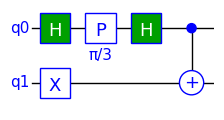

In [6]:
qc.draw()

In [7]:
qc.display_state(r'\ket{\psi} = ')

<IPython.core.display.Math object>

By default, the gates are executed as they are added to the circuit, so there is no need to run the simulator explicitly and we can print the state at any time. This behaviour can be overridden if explicit execution is required.

The format may be customised in various ways. For example:

In [8]:
qc.display_state(decimals=2, include_zeros=True)

<IPython.core.display.Math object>

It is also possible to format the state as plain text using 'format_state' instead of 'display_state'. This is useful when using TinyQsim from a Python script instead of from a Jupyter notebook. This method should be called in a 'print' statement to ensure proper formatting.

In [9]:
print(qc.format_state())

(0.75+0.43301j)|01⟩ + (0.25-0.43301j)|10⟩


Once the output is longer than a few lines, the 'sum-of-kets' notation becomes hard to read. It is then better to display the results as a table, using the 'table' option (This option is not currently supported by 'display_state').

In [10]:
print(qc.format_state('table', include_zeros=True))

|00⟩  0
|01⟩  (0.75+0.43301j)
|10⟩  (0.25-0.43301j)
|11⟩  0


The raw state vector is available from the 'state_vector' property as a numpy array:

In [11]:
qc.state_vector

array([0.  +0.j       , 0.75+0.4330127j, 0.25-0.4330127j, 0.  +0.j       ])

The real and imaginary parts of the complex state vector can be plotted as follows:

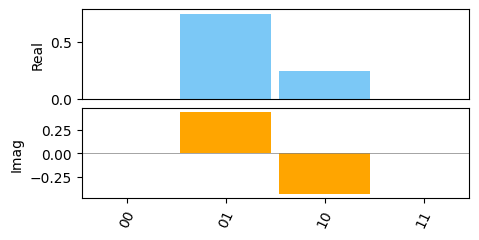

In [12]:
qc.plot_real_imag()

The complex state may also be plotted as magnitude and phase:

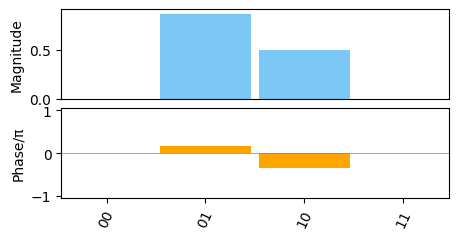

In [13]:
qc.plot_mag_phase()

### Probabilities

The probabilities of the various measurement outcomes are the squares of the absolute values of the amplitudes of their complex state components:

In [14]:
qc.probability_array()

array([0.  , 0.75, 0.25, 0.  ])

It is convenient to display the probabilities along with the ket labels of the associated basis states using the 'format_probabilities' method. This method should be called in a 'print' statement to ensure proper formatting. 

In [15]:
print(qc.format_probabilities())

|01⟩  0.75
|10⟩  0.25


Various formatting options may be specified. For example:

In [16]:
print(qc.format_probabilities(decimals=3, include_zeros=True, trim=False))

|00⟩  0.000
|01⟩  0.750
|10⟩  0.250
|11⟩  0.000


The probability distribution can be plotted as follows:

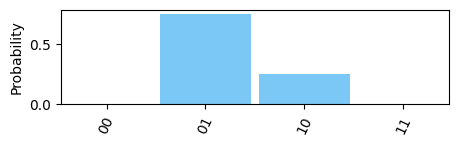

In [17]:
qc.plot_probabilities()

The 'format_probabilities' and 'plot_probabilities' methods are intended for use with circuits that do *not* contain any measurement operations, since these would collapse the state. The probabilities tell us the probabilities of different outcomes if we were to perform a measurement, but it does not perform a measurement, so there is no collapse.

### Measurements

A real quantum computer does not allow us to see the quantum state. Measuring the state causes it to collapse to one of the basis states according to the probabilities shown above. If we want to estimate the probabilities on a quantum computer, we have to run the circuit many times and look at the frequency of different outcomes.

With a simulator, we have the advantage that we have access to the state and can directly calculate the probabilities of different measurement outcomes without actually performing a measurement. This provides a useful performance improvement when we don't actually need measurements.

We can simulate this probabilistic outcome using the 'counts' or 'plot_counts' methods. For example:

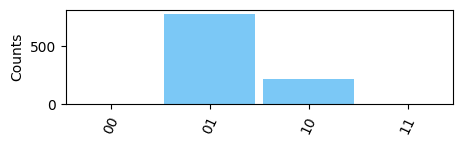

In [18]:
qc.plot_counts(runs=1000)

In [19]:
qc.counts(runs=1000)

{'01': 748, '10': 252}

If we call 'counts' or 'plot_counts' again, it simulates another 1000 runs, so the counts are likely to be different:

In [20]:
qc.counts(runs=1000)

{'01': 735, '10': 265}

The default mode of 'counts' is to resample the probability distribution from a single run. This is suitable when the circuit contains no measurements. This is much more efficient than running the circuit many times and can be an important consideration for circuits containing more than a few qubits.

If we want to simulate measurements that collapse the state, we must add measurement operations to the quantum circuit as follows:

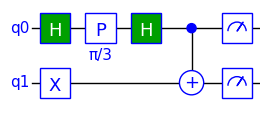

In [21]:
qc.measure()
qc.draw()

If we display the state after the measurements, it will have collapsed to either $\ket{01}$ or $\ket{10}$:

In [22]:
qc.display_state()

<IPython.core.display.Math object>

The complex coefficient corresponds to $e^{i\pi/6}$ which is a global phase of $\pi/6$. This is not physically meaningful and can be ignored.

The 'counts' or 'plot_counts' methods can be called using the 'repeat' or 'measure' mode so that they actually run the circuit many times to generate measurement counts, rather than just resampling the output state of a single run. The difference between 'repeat' and 'measure' is discussed in the next tutorial. For this simple example, either can be used.

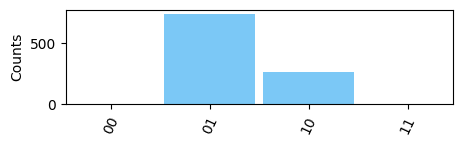

In [23]:
qc.plot_counts(mode='measure', runs=1000)

### Unitary Matrix

Individual quantum gates implement unitary operators expressed as unitary matrices. Complete circuits built from gates can also be expressed as a unitary matrix, provided that the circuit contains no measurement operations.

It is sometimes useful to obtain the unitary matrix corresponding to a circuit. The matrix can become very large if there are many qubits, so this is mostly of interest for simple circuits with a few qubits.

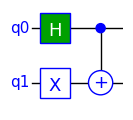

In [24]:
qc = QCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)
qc.draw()

In [25]:
u = qc.to_unitary()
print(u)

[[ 0.          0.70710678  0.          0.70710678]
 [ 0.70710678  0.          0.70710678  0.        ]
 [ 0.70710678  0.         -0.70710678  0.        ]
 [ 0.          0.70710678  0.         -0.70710678]]


### Bloch Sphere

TinyQsim allows the state of a single qubit to be plotted on the Bloch sphere:

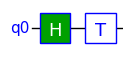

<IPython.core.display.Math object>

In [26]:
qc1 = QCircuit(1)  # This must be 1 qubit
qc1.h(0)
qc1.t(0)
qc1.draw()
qc1.display_state()

The Bloch Sphere is drawn as follows, with the state vector drawn in red.

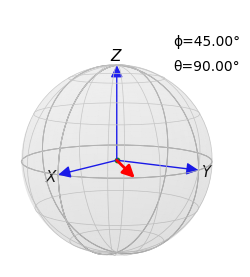

In [27]:
qc1.plot_bloch(scale=0.9)

### Summary

This has been a quick introduction to TinyQsim. The next tutorial goes into the various features in more detail. The API documentation, particularly of the QCircuit class, provides further details of all the methods including their arguments and defaults.